## Jízda na tyči (CartPole)

> **Problém**: Pokud chce Petr utéct vlkovi, musí se pohybovat rychleji než on. Podíváme se, jak se Petr může naučit bruslit, konkrétně udržovat rovnováhu, pomocí Q-Learningu.

Nejprve nainstalujeme knihovnu gym a importujeme potřebné knihovny:


In [1]:
#code block 1

## Vytvořte prostředí cartpole


In [ ]:
#code block 2

Abychom viděli, jak prostředí funguje, spusťme krátkou simulaci na 100 kroků.


In [ ]:
#code block 3

Během simulace potřebujeme získat pozorování, abychom se rozhodli, jak jednat. Funkce `step` nám ve skutečnosti vrací aktuální pozorování, funkci odměny a příznak `done`, který naznačuje, zda má smysl pokračovat v simulaci nebo ne:


In [ ]:
#code block 4

Můžeme získat minimální a maximální hodnotu těchto čísel:


In [5]:
#code block 5

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [6]:
#code block 6

Pojďme také prozkoumat další metodu diskretizace pomocí binů:


In [7]:
#code block 7

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


Pojďme nyní spustit krátkou simulaci a pozorovat tyto diskrétní hodnoty prostředí.


In [8]:
#code block 8

(0, 0, -2, -2)
(0, 1, -2, -5)
(0, 2, -3, -8)
(0, 3, -5, -11)
(0, 3, -7, -14)
(0, 4, -10, -17)
(0, 3, -14, -15)
(0, 3, -17, -12)
(0, 3, -20, -16)
(0, 4, -23, -19)


## Struktura Q-Tabulky


In [12]:
#code block 9

In [13]:
#code block 10

In [14]:
#code block 11

0: 22.0, alpha=0.3, epsilon=0.9
5000: 70.1384, alpha=0.3, epsilon=0.9
10000: 121.8586, alpha=0.3, epsilon=0.9
15000: 149.6368, alpha=0.3, epsilon=0.9
20000: 168.2782, alpha=0.3, epsilon=0.9
25000: 196.7356, alpha=0.3, epsilon=0.9
30000: 220.7614, alpha=0.3, epsilon=0.9
35000: 233.2138, alpha=0.3, epsilon=0.9
40000: 248.22, alpha=0.3, epsilon=0.9
45000: 264.636, alpha=0.3, epsilon=0.9
50000: 276.926, alpha=0.3, epsilon=0.9
55000: 277.9438, alpha=0.3, epsilon=0.9
60000: 248.881, alpha=0.3, epsilon=0.9
65000: 272.529, alpha=0.3, epsilon=0.9
70000: 281.7972, alpha=0.3, epsilon=0.9
75000: 284.2844, alpha=0.3, epsilon=0.9
80000: 269.667, alpha=0.3, epsilon=0.9
85000: 273.8652, alpha=0.3, epsilon=0.9
90000: 278.2466, alpha=0.3, epsilon=0.9
95000: 269.1736, alpha=0.3, epsilon=0.9


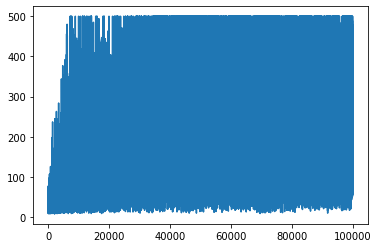

In [20]:
plt.plot(rewards)

Z tohoto grafu nelze nic vyčíst, protože vzhledem k povaze stochastického tréninkového procesu se délka tréninkových sezení značně liší. Abychom tento graf lépe pochopili, můžeme vypočítat **klouzavý průměr** přes sérii experimentů, řekněme 100. To lze snadno provést pomocí `np.convolve`:


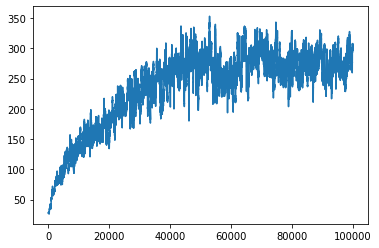

In [22]:
#code block 12

## Různé hyperparametry a sledování výsledků v praxi

Teď by bylo zajímavé skutečně vidět, jak se chová natrénovaný model. Spusťme simulaci a budeme postupovat podle stejné strategie výběru akcí jako během tréninku: vzorkování podle pravděpodobnostního rozložení v Q-Tabulce:


In [23]:
# code block 13

## Uložení výsledku jako animovaný GIF

Pokud chcete zapůsobit na své přátele, můžete jim poslat animovaný GIF obrázek vyvažovací tyče. K tomu můžeme použít `env.render` pro vytvoření obrazového snímku a poté je uložit jako animovaný GIF pomocí knihovny PIL:


In [26]:
from PIL import Image
obs = env.reset()
done = False
i=0
ims = []
while not done:
   s = discretize(obs)
   img=env.render(mode='rgb_array')
   ims.append(Image.fromarray(img))
   v = probs(np.array([Qbest.get((s,a),0) for a in actions]))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
   i+=1
env.close()
ims[0].save('images/cartpole-balance.gif',save_all=True,append_images=ims[1::2],loop=0,duration=5)
print(i)

360



---

**Prohlášení**:  
Tento dokument byl přeložen pomocí služby pro automatický překlad [Co-op Translator](https://github.com/Azure/co-op-translator). I když se snažíme o co největší přesnost, mějte prosím na paměti, že automatické překlady mohou obsahovat chyby nebo nepřesnosti. Za autoritativní zdroj by měl být považován původní dokument v jeho původním jazyce. Pro důležité informace doporučujeme profesionální lidský překlad. Neodpovídáme za žádná nedorozumění nebo nesprávné výklady vyplývající z použití tohoto překladu.
